In [227]:
%run CategoricalEncoder.py

import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
pd.read_csv('adult.csv').head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [2]:
data = pd.read_csv('adult.csv')[['age', 'workclass', 'education', 'sex', 'occupation', 'hours.per.week','income']]

### Dimensions

In [3]:
m,n = data.shape
print("Samples = %d"% m)
print("Features = %d "% (n-1))

Samples = 32561
Features = 6 


### Response

In [4]:
print(' Categorical output')
data['income'].unique()

 Categorical output


array(['<=50K', '>50K'], dtype=object)

In [5]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

#### conclusion: 
unbalanced output

In [6]:
Predictors = data[['age', 'workclass', 'education', 'sex', 'occupation', 'hours.per.week']]
Target = data['income']

In [7]:
Predictors.head()

age workclass     education     sex         occupation  hours.per.week
0   90         ?       HS-grad  Female                  ?              40
1   82   Private       HS-grad  Female    Exec-managerial              18
2   66         ?  Some-college  Female                  ?              40
3   54   Private       7th-8th  Female  Machine-op-inspct              40
4   41   Private  Some-college  Female     Prof-specialty              40

#### quantitative variables:
* Age = Continuous
* hours.per.week = Count

#### qualitative variables:
* workclass
* education
* sex

### Qualitative variables

In [8]:
Caterical = Predictors[['workclass', 'education', 'sex', 'occupation']]

In [9]:
Caterical['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
Caterical['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [11]:
Caterical['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

#### One-Hot-Encoding (Dummy Variables)

In [12]:
one_hot_Encoding = pd.get_dummies(data)
one_hot_Encoding.head()

age  hours.per.week  workclass_?  workclass_Federal-gov  \
0   90              40            1                      0   
1   82              18            0                      0   
2   66              40            1                      0   
3   54              40            0                      0   
4   41              40            0                      0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                    0                       0                  0   
1                    0                       0                  1   
2                    0                       0                  0   
3                    0                       0                  1   
4                    0                       0                  1   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                       0                           0                    0   
1                       0                           0                    0   
2                       0                           0                    0   
3                       0                           0                    0   
4                       0                           0                    0   

      ...       occupation_Machine-op-inspct  occupation_Other-service  \
0     ...                                  0                         0   
1     ...                                  0                         0   
2     ...                                  0                         0   
3     ...                                  1                         0   
4     ...                                  0                         0   

   occupation_Priv-house-serv  occupation_Prof-specialty  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          1   

   occupation_Protective-serv  occupation_Sales  occupation_Tech-support  \
0                           0                 0                        0   
1                           0                 0                        0   
2                           0                 0                        0   
3                           0                 0                        0   
4                           0                 0                        0   

   occupation_Transport-moving  income_<=50K  income_>50K  
0                            0             1            0  
1                            0             1            0  
2                            0             1            0  
3                            0             1            0  
4                            0             1            0  

[5 rows x 46 columns]

In [13]:
list(one_hot_Encoding)

['age',
 'hours.per.week',
 'workclass_?',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'sex_Female',
 'sex_Male',
 'occupation_?',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_

conclusions: 
* get_dummies function in pandas treats all numbers as continuous and will not create dummy variables for them.
* if we specify numeric Feature as Categorical Feature 'get_dummy' well work. 
* scikit-learn’s OneHotEncoder , for which you can specify which variables are continuous. and which are discrete, or convert numeric columns in the DataFrame to strings.

In [84]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],           
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
demo_df

Categorical Feature  Integer Feature
0               socks                0
1                 fox                1
2               socks                2
3                 box                1

# get_dummies function from pandas

In [101]:
pd.get_dummies(demo_df)# leaving the integer feature unchanged

Integer Feature  Categorical Feature_box  Categorical Feature_fox  \
0                0                        0                        0   
1                1                        0                        1   
2                2                        0                        0   
3                1                        1                        0   

   Categorical Feature_socks  
0                          1  
1                          0  
2                          1  
3                          0

In [102]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

Integer Feature_0  Integer Feature_1  Integer Feature_2  \
0                  1                  0                  0   
1                  0                  1                  0   
2                  0                  0                  1   
3                  0                  1                  0   

   Categorical Feature_box  Categorical Feature_fox  Categorical Feature_socks  
0                        0                        0                          1  
1                        0                        1                          0  
2                        0                        0                          1  
3                        1                        0                          0

# LabelEncoder  and OneHotEncoder

#### if categoric feature contain string convert it to  numerical using LabelEncoder

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
encoder1 = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

In [86]:
demo_df1 = demo_df.apply(label_encoder.fit_transform) # convert string to numeric
demo_df1

Categorical Feature  Integer Feature
0                    2                0
1                    1                1
2                    2                2
3                    0                1

In [87]:
encoder1.fit_transform(demo_df1)

array([[0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.]])

#### if we have all categoric features are numeric we can directly apply OneHotEncoder

In [103]:
demo_df2 = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],           
                        'Categorical Feature': [6,8,8,6]})
demo_df2

Categorical Feature  Integer Feature
0                    6                0
1                    8                1
2                    8                2
3                    6                1

In [104]:
encoder2 = OneHotEncoder(sparse=False)
encoder2.fit_transform(demo_df2)

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

# CategoricalEncoder

In [99]:
# encoding : str, ‘onehot’, ‘onehot-dense’ or ‘ordinal’
cat_encoder =  CategoricalEncoder(encoding='onehot-dense')

In [100]:
cat_encoder.fit_transform(demo_df)

array([[0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.]])

In [105]:
features = one_hot_Encoding.ix[:, 'age': 'occupation_Transport-moving']
features.head()

age  hours.per.week  workclass_?  workclass_Federal-gov  \
0   90              40            1                      0   
1   82              18            0                      0   
2   66              40            1                      0   
3   54              40            0                      0   
4   41              40            0                      0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                    0                       0                  0   
1                    0                       0                  1   
2                    0                       0                  0   
3                    0                       0                  1   
4                    0                       0                  1   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                       0                           0                    0   
1                       0                           0                    0   
2                       0                           0                    0   
3                       0                           0                    0   
4                       0                           0                    0   

              ...               occupation_Farming-fishing  \
0             ...                                        0   
1             ...                                        0   
2             ...                                        0   
3             ...                                        0   
4             ...                                        0   

   occupation_Handlers-cleaners  occupation_Machine-op-inspct  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             1   
4                             0                             0   

   occupation_Other-service  occupation_Priv-house-serv  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   occupation_Prof-specialty  occupation_Protective-serv  occupation_Sales  \
0                          0                           0                 0   
1                          0                           0                 0   
2                          0                           0                 0   
3                          0                           0                 0   
4                          1                           0                 0   

   occupation_Tech-support  occupation_Transport-moving  
0                        0                            0  
1                        0                            0  
2                        0                            0  
3                        0                            0  
4                        0                            0  

[5 rows x 44 columns]

In [106]:
x = features.values
y = one_hot_Encoding['income_>50K'].values

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [108]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
logreg.score(X_test, y_test)

0.8125287885766928

# PolynomialFeatures

In [110]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [153]:
X,y = make_wave()
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [148]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [149]:
X_poly.shape

(100, 10)

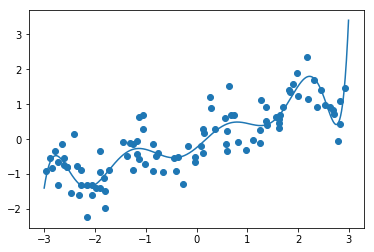

In [156]:
reg = LinearRegression().fit(X_poly, y)
plt.scatter(X,y)
x =plt.plot(line, reg.predict(poly.transform(line)))

conclusion:
* polynomials of high degree tend to behave in extreme ways on the boundaries or in regions with little data.

In [157]:
from sklearn.svm import SVR

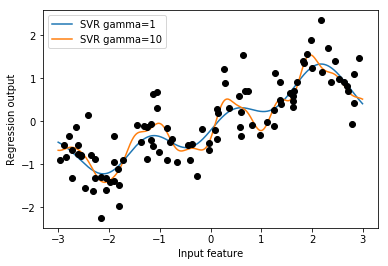

In [162]:
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

conclusion:
* Using a more complex model, a kernel SVM, we are able to learn a similarly complex prediction to the polynomial regression without an explicit transformation of the features.

# Univariate Nonlinear Transformations

tree-based models only care about the ordering of the features, linear models and
neural networks are very tied to the scale and distribution of each feature, and if there
is a nonlinear relation between the feature and the target, that becomes hard to model
—particularly in regression.

The functions log and exp can help by adjusting the rel‐
ative scales in the data so that they can be captured better by a linear model or neural
network.

A particularly common case
when such a transformation can be helpful is when dealing with integer count data.

In [164]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

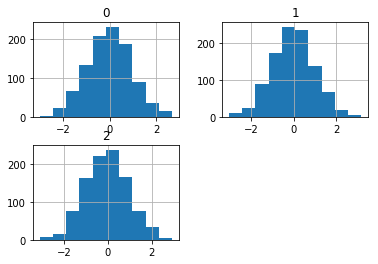

In [170]:
x =pd.DataFrame(X_org).hist()

In [182]:
X = rnd.poisson(10 * np.exp(X_org))

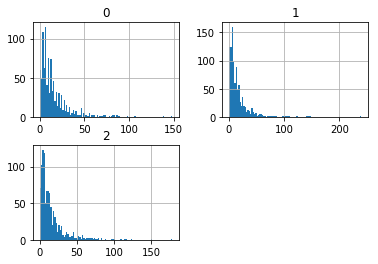

In [198]:
x = pd.DataFrame(X).hist(bins=100)

In [184]:
y = np.dot(X_org, w)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3934aa400>]],
      dtype=object)

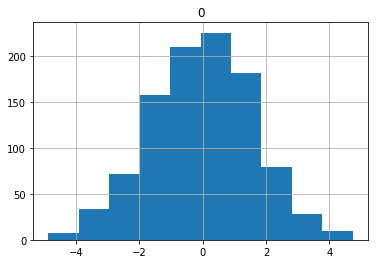

In [186]:
pd.DataFrame(y).hist()

In [201]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

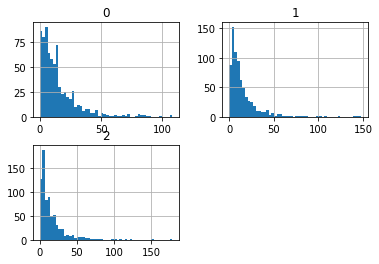

In [202]:
x = pd.DataFrame(X_train).hist(bins=50)

In [199]:
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.610


In [207]:
X_train_log = np.log(X_train+1 )
X_test_log = np.log(X_test+1)

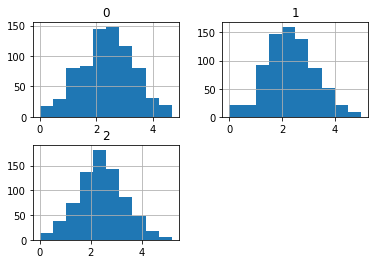

In [210]:
x = pd.DataFrame(X_train_log).hist(bins=10)

In [211]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


# Automatic Feature Selection

* univariate statistics.
* model-based selection.
* iterative selection.

#### Univariate Statistics

* In univariate statistics, we compute whether there is a statistically significant relation‐ship between each feature and the target.
* Then the features that are related with the highest confidence are selected. 
* In the case of classification, this is also known as analysis of variance (ANOVA).

* To use univariate feature selection in scikit-learn , you need to choose a test,
 * usually either f_classif (the default) for classification 
 * f_regression for regression,<br>
and a method to discard features based on the p-values determined in the test.

In [213]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [215]:
cancer = load_breast_cancer()
len(cancer.data)

569

In [217]:
cancer.data.shape

(569, 30)

In [218]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

In [219]:
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

In [222]:
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)


In [225]:
X_train_selected .shape, X_train.shape

((284, 40), (284, 80))

As you can see, the number of features was reduced from 80 to 40

In [226]:
# We can find out which features have been selected using the get_support method
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False, False, False, False])

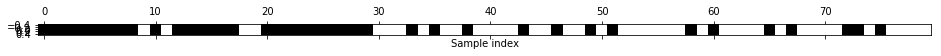

In [262]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
x= plt.xlabel("Sample index")

In [263]:
from sklearn.linear_model import LogisticRegression
# transform test data
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


#### Model-Based Feature Selection

* Decision trees and decision tree–based models provide a feature_importances_
* Linear models have coefficients

linear models with L1 penalty learn sparse coefficients, which only use a small subset of features.<br>
In contrast to univariate selection, model-based selection considers all features at once

To use model-based feature selection, we need to use the SelectFromModel transformer:

In [264]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [265]:
select = SelectFromModel( RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

The SelectFromModel class selects all features that have an importance measure of the feature (as provided by the supervised model) greater than the provided threshold

In [266]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

In [267]:
mask = select.get_support()

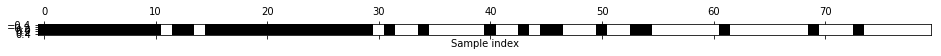

In [268]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
x= plt.xlabel("Sample index")

In [269]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


# Iterative Feature Selection

* In univariate testing we used no model, while in model-based selection we used a single model to select features. In iterative feature selection, a series of models are built, with varying numbers of features. 
* There are two basic methods: 
   * starting with no features and adding features one by one until some stopping criterion is reached.
   * starting with all features and removing features one by one until some stopping criterion is reached. 
* Because a series of models are built, these methods are much more computationally expensive than the methods we discussed previously. 
* One particular method of this kind is recursive feature elimination (RFE), 
   * which starts with all features, builds a model, and discards the least important feature according to the model.
   * Then a new model is built using all but the discarded feature, and so on until only a prespecified number of features are left.

In [270]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

In [271]:
select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

Text(0.5,0,'Sample index')

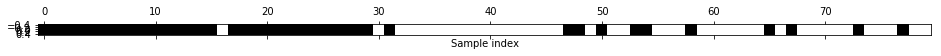

In [272]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [273]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951
